In [1]:
import matplotlib.pyplot as plt
import numpy as np
import signac
import gsd.hoomd

In [2]:
project = signac.get_project("/home/stephaniemccallu/scratch/Entanglements")

/tmp/ipykernel_634206/558467629.py:5: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(time[1:], msd_nm[1:], linewidth=3, label=(length,"mid"))


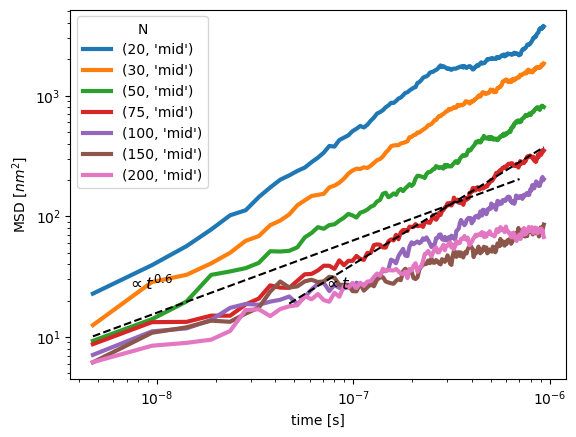

In [7]:
for length, jobs in project.find_jobs({"doc.sampled": True}).groupby("doc.lengths"):
    for job in jobs:
        time = np.load(job.fn("msd_time_mid.npy"))
        msd_nm = np.load(job.fn("msd_data_real_nm_squared_mid.npy"))
        plt.plot(time[1:], msd_nm[1:], linewidth=3, label=(length,"mid"))
plt.plot(
    time[1:150],
    time[1:150]**(0.6) * 10e5,
    color="black",
    linestyle="--"
)
plt.plot(
    time[10:],
    time[10:] * 4e8,
    color="black",
    linestyle="--"
)
plt.text(0.7e-8, 25, "$\propto t^{0.6}$",fontsize=12, color="black")
plt.text(0.7e-7, 25, "$\propto t$",fontsize=12, color="black")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("time [s]")
plt.ylabel("MSD [$nm^2]$")
plt.legend(title="N")

## Bootstrap sampling

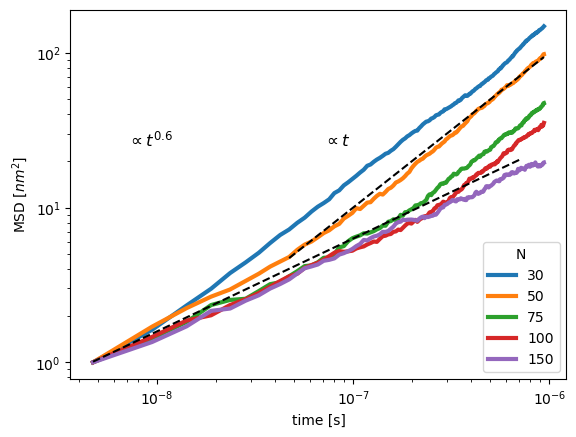

In [10]:
for length, jobs in project.find_jobs({"doc.sampled":True}).groupby("doc.lengths"):
    for job in jobs:
        if length >=30 and length <=150:
            time = np.load(job.fn("msd_time_bs.npy"))
            msd_nm = np.load(job.fn("msd_data_real_nm_squared_bs.npy"))
            shifted_msd_nm = np.zeros((len(msd_nm)))
            for i in range(0,len(msd_nm)):
                shifted_msd_nm[i] = msd_nm[i]/msd_nm[1]
            plt.plot(time[1:], shifted_msd_nm[1:], linewidth=3, label=length)
            #plt.plot(time[1:], msd_nm[1:], linewidth=3, label=length)
plt.plot(
    time[1:150],
    time[1:150]**(0.6)*10e4,
    color="black",
    linestyle="--"
)
plt.plot(
    time[10:],
    time[10:]*10e7,
    color="black",
    linestyle="--"
)
plt.text(0.7e-8, 25, "$\propto t^{0.6}$",fontsize=12, color="black")
plt.text(0.7e-7, 25, "$\propto t$",fontsize=12, color="black")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("time [s]")
plt.ylabel("MSD [$nm^2]$")
plt.legend(title="N")

In [9]:
plt.savefig('mid production.png')

<Figure size 640x480 with 0 Axes>

[5.6018996]
[9.389577]
[11.087066]
[18.190008]
[34.91143]
[35.484203]
[24.779305]


/tmp/ipykernel_634206/2951073740.py:14: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(length, average, marker=".", label=(length,"mid"))


Text(0, 0.5, 'Difference in MSD [$nm^2]$')

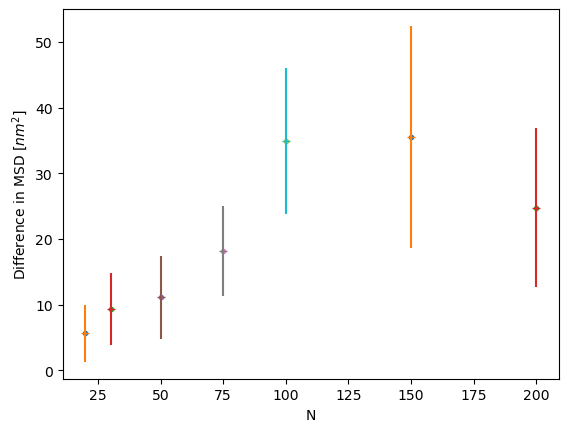

In [28]:
for length, jobs in project.find_jobs({"doc.sampled": True}).groupby("doc.lengths"):
    for job in jobs:
        time = np.load(job.fn("msd_time.npy"))
        msd_nm = np.load(job.fn("msd_data_real_nm_squared.npy"))
        ##plt.plot(time[1:], msd_nm[1:], linewidth=3, label=length)
        time_mid = np.load(job.fn("msd_time_mid.npy"))
        msd_nm_mid = np.load(job.fn("msd_data_real_nm_squared_mid.npy"))
        ##plt.plot(time_mid[1:], msd_nm_mid[1:], linewidth=3, label=(length,"mid"))
        average = []
        msd_difference = abs(msd_nm[1:] - msd_nm_mid[1:])
        average.append(np.mean(msd_difference))
        e = np.std(abs(msd_nm[1:] - msd_nm_mid[1:]))
        print(average)
        plt.plot(length, average, marker=".", label=(length,"mid"))
        plt.errorbar(length,average, e, linestyle='None', marker='_')

plt.xlabel("N")
plt.ylabel("Difference in MSD [$nm^2]$")